In [112]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [113]:
# ! pip install pandas openpyxl
# For loading .xlsx file

## Analyzing the monthly sales data of Electric Vehicles

In [114]:
df1 = pd.read_excel('smev_data.xlsx', sheet_name='EV 2W FY 19-20')
df1['maker'] = df1['maker'].str.lower()

df2 = pd.read_excel('smev_data.xlsx', sheet_name='EV 2W FY 20-21') 
df2['maker'] = df2['maker'].str.lower()

df3 = pd.read_excel('smev_data.xlsx', sheet_name='EV 2W FY 21-22') 
df3['maker'] = df3['maker'].str.lower()

df4 = pd.read_excel('smev_data.xlsx', sheet_name='EV 2W FY 22-23')
df4['maker'] = df4['maker'].str.lower()
# Standardizing the name format of vehicles in df4 correspoding to other dataframes.
df4['maker'] = df4['maker'].replace({'ampere':'ampere vehicles','ather':'ather energy','okinawa':'okinawa autotech','jitendra new ev':'jitendra','being india':'benling'})

monthly_ev = pd.concat([df1, df2, df3,df4], ignore_index=True)
monthly_ev.sample(10)

,financial_year,maker,market_share,month,num_vehicles
2,2019-20,hero electric,0.30,Jun,329
393,2022-23,ampere vehicles,0.12,Jan,4371
79,2020-21,hero electric,0.36,Nov,1219
142,2020-21,bajaj,0.03,Feb,111
78,2020-21,hero electric,0.36,Oct,355
178,2020-21,jitendra,0.01,Feb,124
281,2021-22,tvs,0.04,Sep,688
57,2019-20,revolt,0.04,Jan,314
18,2019-20,okinawa autotech,0.38,Oct,1006
465,2022-23,pure ev,0.02,Jan,716


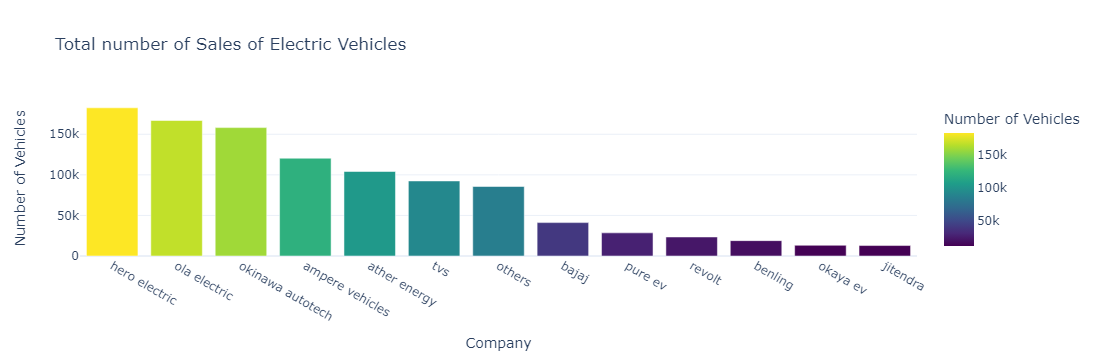

In [115]:
import plotly.express as px

sales_by_maker = monthly_ev.groupby('maker')['num_vehicles'].sum().reset_index()
sales_by_maker = sales_by_maker.sort_values(by='num_vehicles', ascending=False)

fig = px.bar(sales_by_maker, x='maker', y='num_vehicles',
             title='Total number of Sales of Electric Vehicles',
             labels={'maker': 'Company', 'num_vehicles': 'Number of Vehicles'},
             template='plotly_white', color='num_vehicles', color_continuous_scale='viridis',height= 500)

fig.update_layout(xaxis={'categoryorder':'total descending'})  
fig.show()

#### **Hero-electric** is the most sold electric vehicle followed by **Ola-electric** till March, 2023 .

## Sales trend of top 6 vehicles

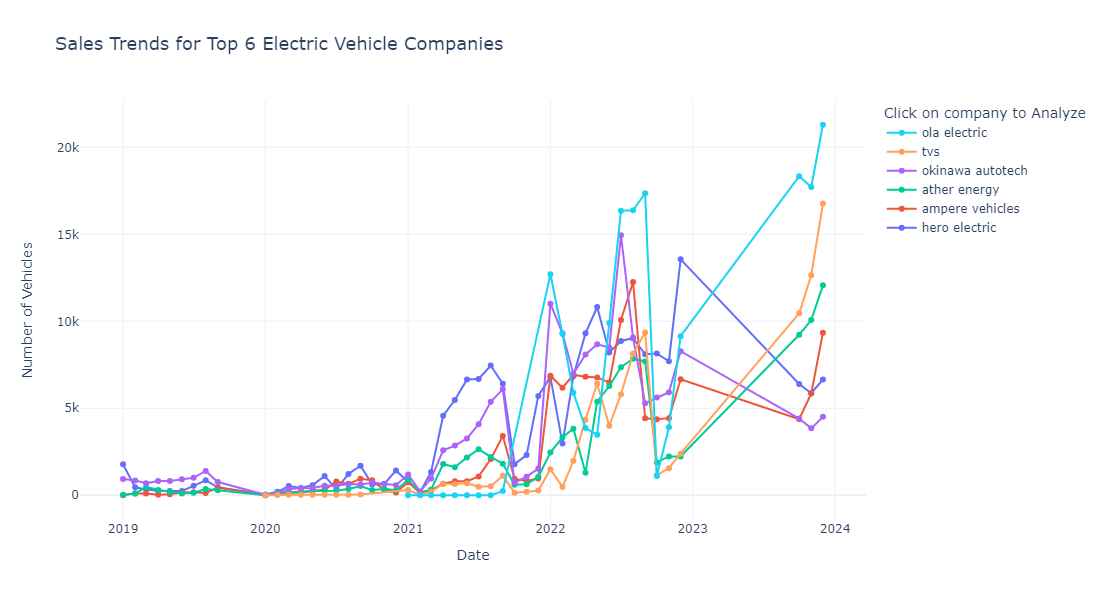

In [116]:
import plotly.express as px

top_companies = ['hero electric', 'ola electric', 'okinawa autotech', 'ampere vehicles', 'ather energy', 'tvs']

filtered_df = monthly_ev[monthly_ev['maker'].isin(top_companies)].copy()

months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
month_to_number = {month: idx + 1 for idx, month in enumerate(months)}

filtered_df.loc[:, 'start_year'] = filtered_df['financial_year'].str[:4].astype(int)
filtered_df.loc[:, 'month_number'] = filtered_df['month'].map(month_to_number)
filtered_df.loc[:, 'year'] = filtered_df.apply(lambda x: x['start_year'] + 1 if x['month_number'] in [10, 11, 12] else x['start_year'], axis=1)
filtered_df['date'] = pd.to_datetime(filtered_df[['year', 'month_number']].rename(columns={'month_number': 'month'}).assign(day=1))
filtered_df = filtered_df.sort_values(by='date')

fig = px.line(filtered_df, x='date', y='num_vehicles', color='maker',
              labels={'date': 'Date', 'num_vehicles': 'Number of Vehicles', 'maker': 'Company'},
              title='Sales Trends for Top 6 Electric Vehicle Companies',template='plotly_white',markers=True)

fig.update_xaxes(tickformat='%Y', tickmode='linear', dtick='M12')
fig.update_layout(showlegend=True, 
                  legend_title_text='Click on company to Analyze',
                  legend_traceorder='reversed',title_font_size=18,height=600, width=1100)
fig.show()


#### **Ola Electric** shows drastic change in sales even though it started its market in 2021; its sales are more in the latest trends

## Category wise distribution

In [117]:
ev_market = pd.read_excel('smev_data.xlsx',sheet_name='EV Market')
ev_market.rename(columns={'Category':'category'},inplace=True)
print(ev_market)
ev_cat = pd.read_excel('smev_data.xlsx',sheet_name='EV Industries')
ev_cat.sample(5)

       category  Amount INR Cr
0  E-2 Wheelers        2464.27
1  E-3 Wheelers         351.21
2  E-4 Wheelers         114.65
3       E-Buses         687.93


,category,financial_year,num_vehicles
13,E-4 Wheelers,2018-19,2407
2,E-2 Wheelers,2019-20,26512
5,E-2 Wheelers,2022-23,728090
22,E-Buses,2021-22,1198
1,E-2 Wheelers,2018-19,27478


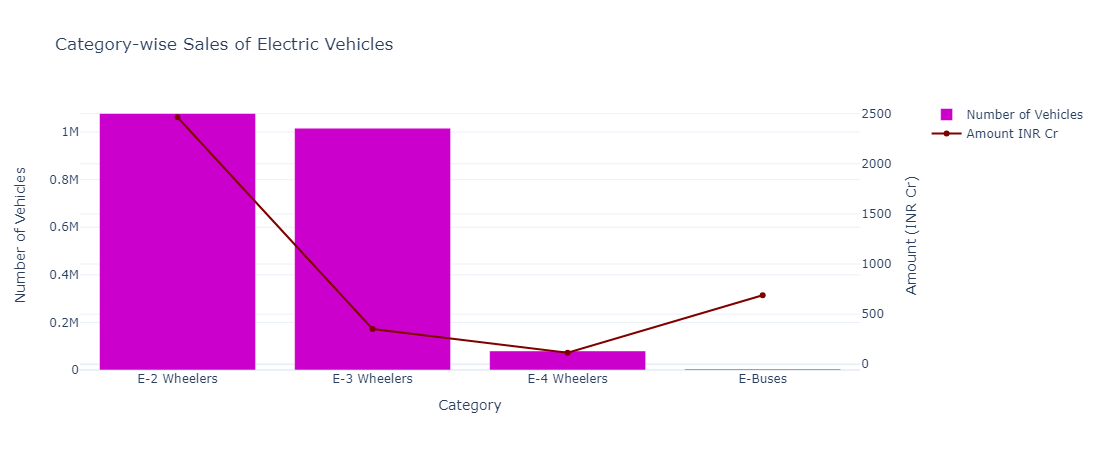

In [118]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sales_by_cat = ev_cat.groupby('category')['num_vehicles'].sum().reset_index()
sales_by_cat = sales_by_cat.sort_values(by='num_vehicles', ascending=False)

merged_df = pd.merge(sales_by_cat, ev_market, on='category')

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=merged_df['category'], y=merged_df['num_vehicles'], name='Number of Vehicles', 
                     marker=dict(color='rgb(204, 0, 204)')),secondary_y=False)

fig.add_trace(go.Scatter(x=merged_df['category'], y=merged_df['Amount INR Cr'], name='Amount INR Cr',
                         marker=dict(color='rgb(128, 0, 0)'), mode='lines+markers'),secondary_y=True)

fig.update_layout(title='Category-wise Sales of Electric Vehicles',xaxis_title='Category',yaxis_title='Number of Vehicles',
                  yaxis2_title='Amount (INR Cr)',template='plotly_white',barmode='group', height=450,width=700)
fig.update_yaxes(title_text="Number of Vehicles", secondary_y=False)
fig.update_yaxes(title_text="Amount (INR Cr)", secondary_y=True)
fig.show()

#  Analyzing the EV-Bike Dataset

In [119]:
ev_bike = pd.read_csv('ev2_bikewale.csv',usecols=['Used it for'	,'Owned for','rating','Visual Appeal','Reliability','Model Name'])
print(ev_bike.shape)
print(ev_bike.isnull().sum())
ev_bike.head()

(844, 6)
Used it for        0
Owned for          0
rating             0
Visual Appeal    105
Reliability      128
Model Name         0
dtype: int64


,Used it for,Owned for,rating,Visual Appeal,Reliability,Model Name
0,Daily Commute,Never owned,1,3.0,4.0,TVS iQube
1,Everything,> 1 yr,1,3.0,1.0,TVS iQube
2,Daily Commute,< 3 months,3,4.0,4.0,TVS iQube
3,Daily Commute,6 months-1 yr,1,1.0,1.0,TVS iQube
4,Daily Commute,6 months-1 yr,1,3.0,4.0,TVS iQube


In [120]:
ev_bike['rating'].unique()

array([1, 3, 2, 5, 4])

In [121]:
ev_bike.dropna(inplace=True)
ev_bike.shape

(713, 6)

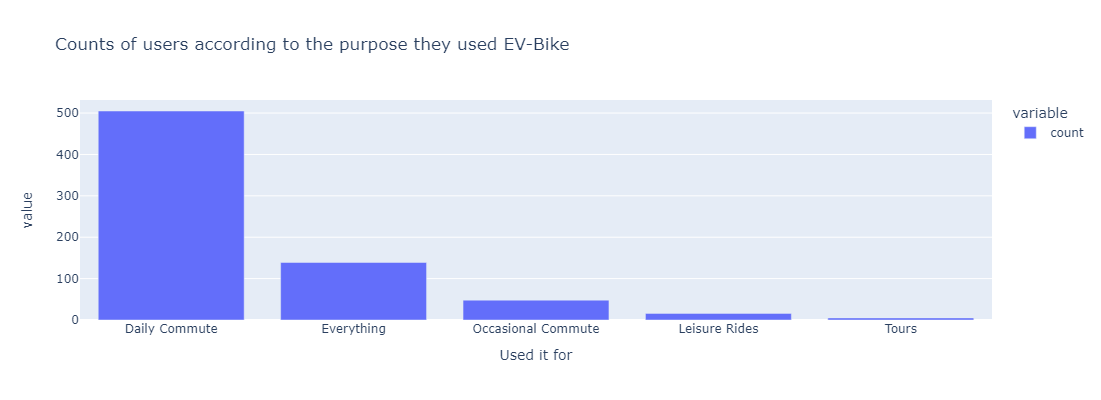

In [122]:
fig = px.bar(ev_bike['Used it for'].value_counts(),width=700,height=400,
            labels={'value''count'},title='Counts of users according to the purpose they used EV-Bike')

fig.show()

### Visualize the Average **Ratings** of Models  that appeared more than 15 times from the current Bike Data

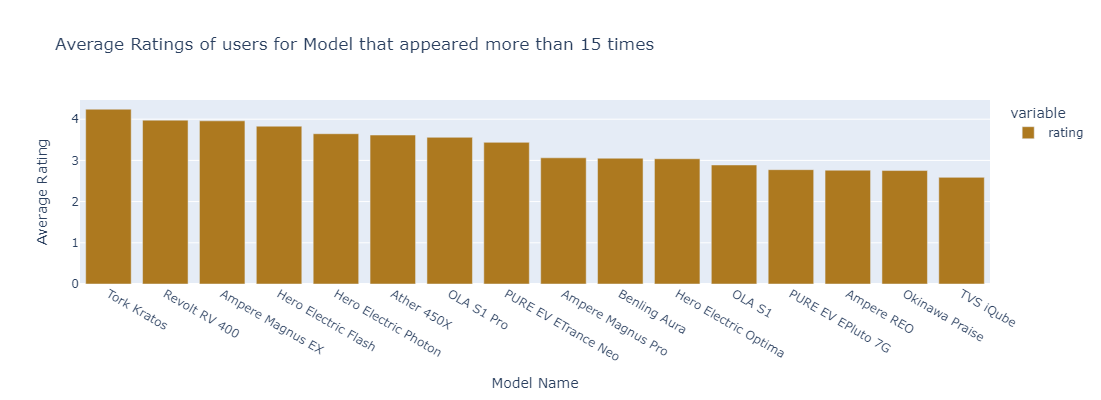

In [123]:
values = ev_bike['Model Name'].value_counts()
modelscount_more_than_15 = values[values >= 15].index.tolist()
filtered = ev_bike[ev_bike['Model Name'].isin(modelscount_more_than_15)]
avg = filtered.groupby('Model Name')['rating'].mean()
avg = avg.sort_values(ascending=False).reindex()

fig = px.bar(avg,labels={'value':'Average Rating'},width=900,height=400,color_discrete_sequence=['#ad791f'],
             title= 'Average Ratings of users for Model that appeared more than 15 times')
fig.show()

### Visualize the Average **Visual Appeal** ratings of models  that appeared more than 15 times from the current Bike Data

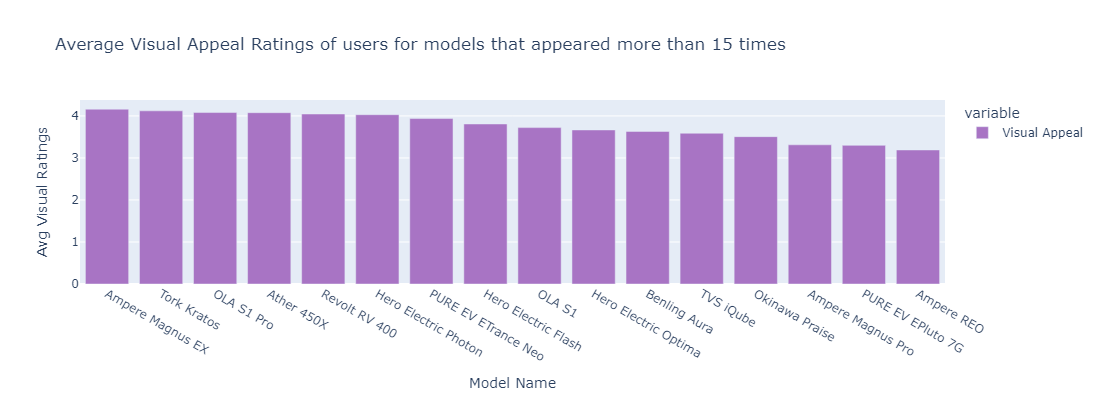

In [124]:
values = ev_bike['Model Name'].value_counts()
modelscount_more_than_15 = values[values >= 15].index.tolist()

filtered = ev_bike[ev_bike['Model Name'].isin(modelscount_more_than_15)]
avg = filtered.groupby('Model Name')['Visual Appeal'].mean()
avg = avg.sort_values(ascending=False)

fig = px.bar(avg,labels={'value':'Avg Visual Ratings'},width=900,height=400,color_discrete_sequence=['#a874c4'],
             title='Average Visual Appeal Ratings of users for models that appeared more than 15 times')
fig.show()

### Visualize the Average **Reliability** ratings of models  that appeared more than 15 times from the current Bike Data

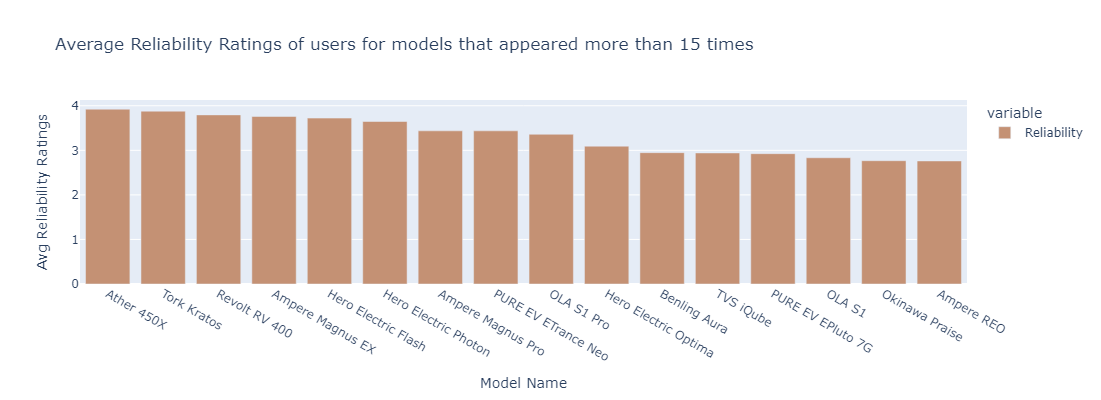

In [125]:
values = ev_bike['Model Name'].value_counts()
modelscount_more_than_15 = values[values >= 15].index.tolist()

filtered = ev_bike[ev_bike['Model Name'].isin(modelscount_more_than_15)]
avg = filtered.groupby('Model Name')['Reliability'].mean()
avg = avg.sort_values(ascending=False)

fig = px.bar(avg,labels={'value':'Avg Reliability Ratings'},width=900, height=400, color_discrete_sequence=['#c49174'],
             title='Average Reliability Ratings of users for models that appeared more than 15 times')
fig.show()

### Correlation Heatmap

In [126]:
columns = ev_bike[['Used it for','Owned for', 'Model Name']]
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in columns:
  if col != 'Age':
    ev_bike[col] = label.fit_transform(ev_bike[col])

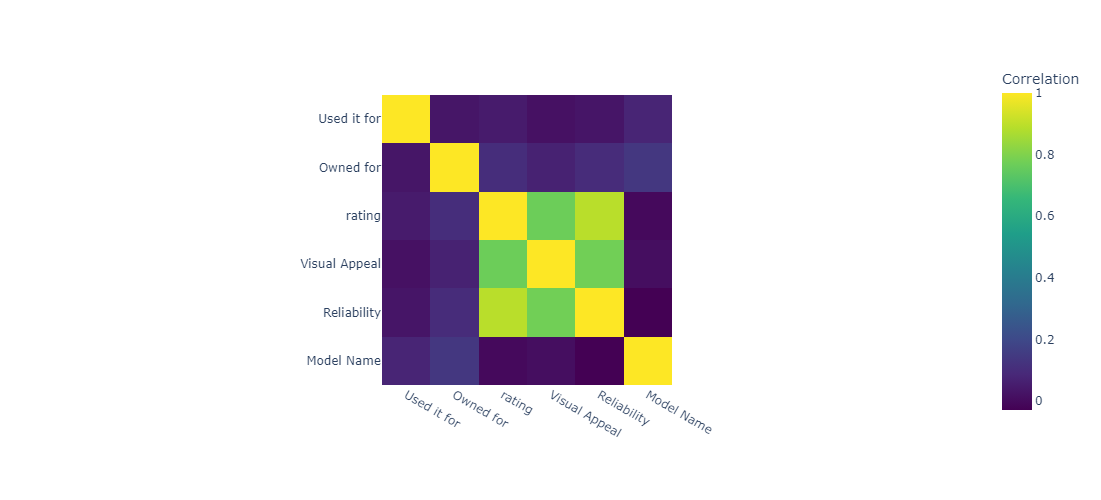

In [127]:
corr_matrix = ev_bike.corr()
fig = px.imshow(corr_matrix, 
                labels={'color': 'Correlation'},
                width=500,height=500,color_continuous_scale='Viridis')
fig.show()

## PCA

In [128]:
from sklearn.decomposition import PCA

segmentation_variables = ev_bike.iloc[:, 0:6]

pca = PCA()
pca_model = pca.fit(segmentation_variables)

# standard deviations (square root of explained variance)
std_devs = np.sqrt(pca.explained_variance_)

prop_var = pca.explained_variance_ratio_

cum_prop_var = np.cumsum(prop_var)

print("Importance of components:\n")
print("Standard deviation:", np.round(std_devs, 4),'\n')
print("Proportion of Variance:", np.round(prop_var, 4,),'\n')
print("Cumulative Proportion:", np.round(cum_prop_var, 4))

Importance of components:

Standard deviation: [10.1176  2.5386  1.2815  0.8826  0.7369  0.5366] 

Proportion of Variance: [0.9135 0.0575 0.0147 0.007  0.0048 0.0026] 

Cumulative Proportion: [0.9135 0.971  0.9856 0.9926 0.9974 1.    ]


In [129]:
rotation_matrix = pd.DataFrame(pca.components_.T, 
                               columns=['PC{}'.format(i+1) for i in range(pca.components_.shape[0])],
                               index= ev_bike.iloc[:, 0:11].columns)
rotation_matrix = -rotation_matrix 

print("Rotation (n x k) = ({} x {}):".format(rotation_matrix.shape[0], rotation_matrix.shape[1]))
print(rotation_matrix)

Rotation (n x k) = (6 x 6):
                    PC1       PC2       PC3       PC4       PC5       PC6
Used it for   -0.006823  0.015030  0.023487 -0.995130 -0.090661  0.025948
Owned for     -0.017862  0.069819  0.996173  0.028231 -0.040297 -0.004923
rating         0.000718  0.645634 -0.031027 -0.044294  0.399509 -0.648556
Visual Appeal -0.001468  0.469413 -0.070961  0.083074 -0.873159 -0.072845
Reliability    0.004487  0.598085 -0.027659  0.004315  0.261012  0.757207
Model Name    -0.999806  0.001109 -0.017999  0.006152  0.004080  0.002950


- The PC1 is primarily associated with the **Model Name** of the electric vehicles.
- The PC2 captures the combined variance of **rating**, **Reliability**, and **Visual Appeal**, suggesting these features are correlated and represent a dimension of overall user satisfaction or quality perception.
- The PC3 is almost entirely driven by the **Owned for** feature.


## K-means Clustering 

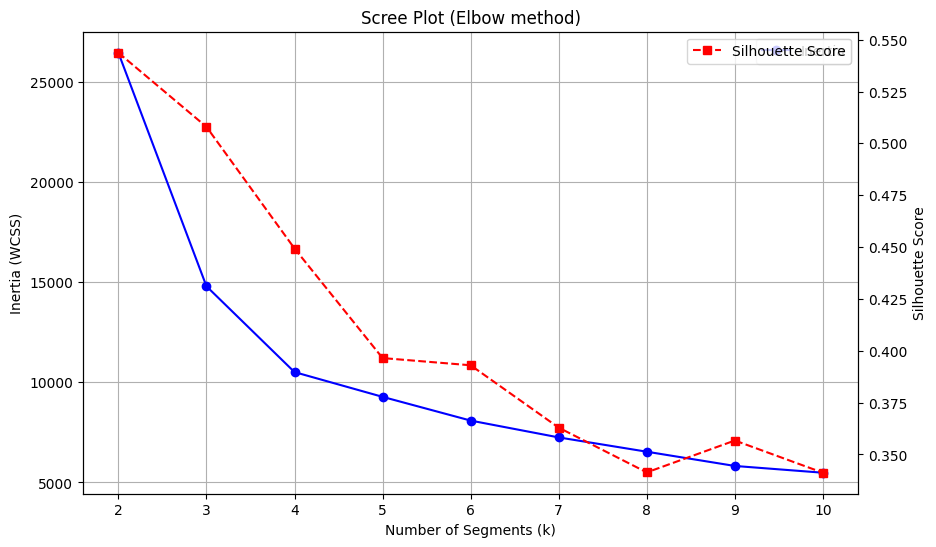

In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

k_range = range(2, 11) 
inertia_values = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(segmentation_variables)
    inertia_values.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(segmentation_variables, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b', label='Inertia')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Scree Plot (Elbow method)')
plt.xticks(k_range)
plt.grid(True)
plt.legend()

plt.twinx()
plt.plot(k_range, silhouette_scores, marker='s', linestyle='--', color='r', label='Silhouette Score')
plt.ylabel('Silhouette Score')
plt.legend(loc='upper right')

plt.show()

- By analyzing the **Elbow Curve**, we can make a decision to make **5** clusters of our small dataset, as the further curve is kind of constant.
- Also, the **Silhouette Score** from 5th to 6th cluster in not much deviating, rather it is kind of decreasing further as the number of clusters increases.  A higher silhouette score indicates better-defined clusters.

In [134]:
import seaborn as sns
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(segmentation_variables)

ev_bike['cluster_num'] = kmeans.labels_
# print("Cluster labels:", kmeans.labels_)
print("Within-cluster sum of squares (inertia):", kmeans.inertia_)
print("Number of iterations:", kmeans.n_iter_)
print("Cluster center coordinates:", kmeans.cluster_centers_)



Within-cluster sum of squares (inertia): 9408.453895080493
Number of iterations: 8
Cluster center coordinates: [[ 0.2         1.91111111  1.54444444  2.53333333  1.68888889 26.42222222]
 [ 0.33571429  1.96428571  3.35        3.75        3.38571429  3.46428571]
 [ 0.49787234  2.1106383   3.51489362  3.77446809  3.43829787 14.28085106]
 [ 0.62142857  2.63571429  4.          4.15714286  3.84285714 32.19285714]
 [ 0.61111111  2.24074074  3.74074074  4.30555556  3.62037037 22.50925926]]


In [135]:
ev_bike.head()

,Used it for,Owned for,rating,Visual Appeal,Reliability,Model Name,cluster_num
0,0,4,1,3.0,4.0,32,3
1,1,3,1,3.0,1.0,32,3
2,0,2,3,4.0,4.0,32,3
3,0,1,1,1.0,1.0,32,3
4,0,1,1,3.0,4.0,32,3


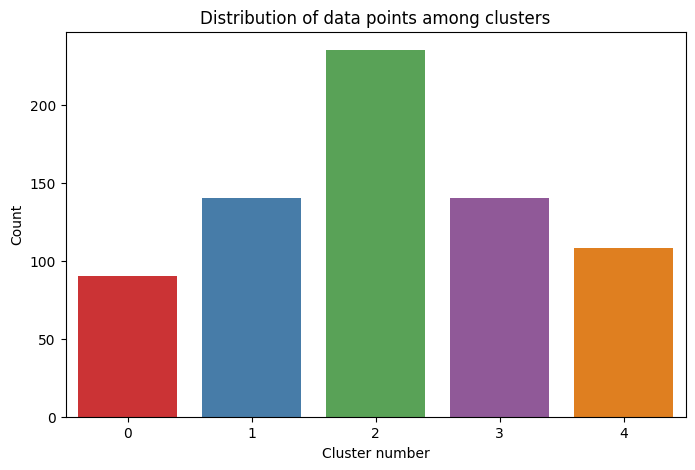

In [133]:
plt.figure(figsize=(8,5))
sns.countplot(x = ev_bike["cluster_num"], palette = 'Set1')
plt.xlabel("Cluster number")
plt.ylabel("Count")
plt.title("Distribution of data points among clusters")
plt.show()

We can observe that **Cluster-2** grouped the highest number of data points. This indicates that the majority of the electric vehicles in the market share similar characteristics captured by the features used in our analysis.

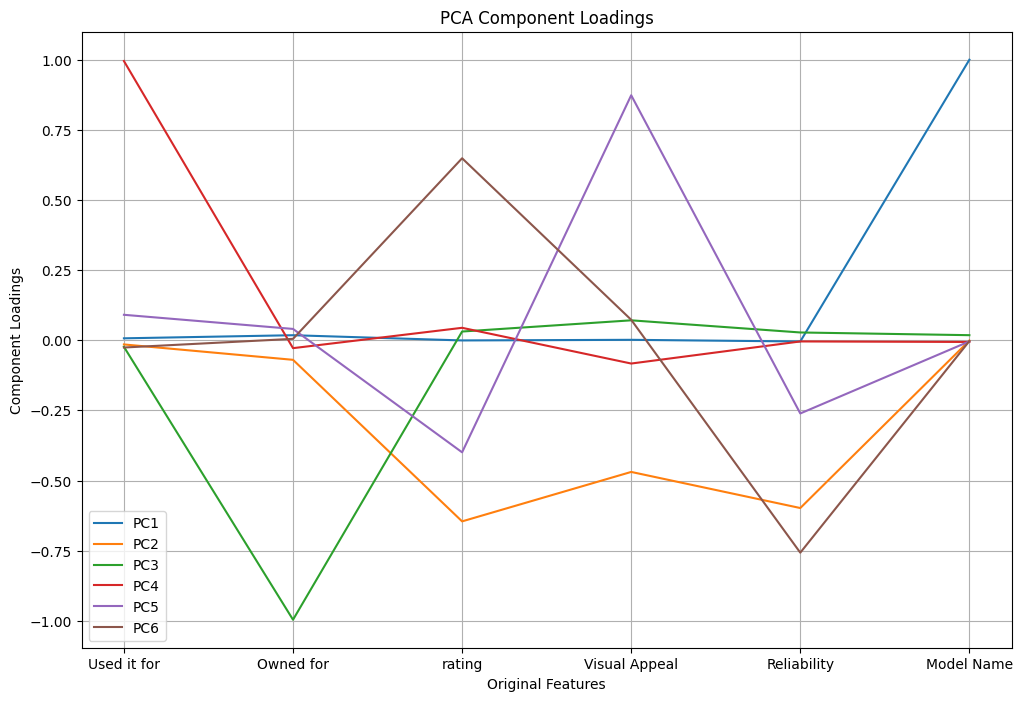

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pca and segmentation_variables are already defined
pca = PCA(n_components=6)
pca.fit(segmentation_variables)

# Creating a DataFrame of principal components
rotation_matrix = pd.DataFrame(pca.components_.T, 
                               columns=['PC{}'.format(i+1) for i in range(pca.components_.shape[0])],
                               index=segmentation_variables.columns)

# Plotting the loadings
plt.figure(figsize=(12, 8))
for i in range(rotation_matrix.shape[1]):
    plt.plot(rotation_matrix.iloc[:, i], label=f'PC{i+1}')

plt.xlabel('Original Features')
plt.ylabel('Component Loadings')
plt.title('PCA Component Loadings')
plt.legend()
plt.grid(True)
plt.show()
